In [1]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from match import match

In [2]:
def radius_check(x,y,r,xx,yy):
    if (x-xx)**2 +(y-yy)**2 <= r**2:
        a = 0
    else:
        a = 1
    return a

In [3]:
# Path for photometry catalogs
path = '/Users/connor_auge/Research/Disertation/catalogs/'

cosmos = fits.open(path+'COSMOS2020_CLASSIC_R1_v2.2_p3.fits')
cosmos_data = cosmos[1].data
cosmos_cols = cosmos[1].columns
cosmos.close()

cosmos2015 = fits.open(path+'COSMOS2015_Laigle+_v1.1.fits')
cosmos2015_data = cosmos2015[1].data

cosmos2015_cols = cosmos2015[1].columns
cosmos2015.close()

chandra_cosmos = fits.open(path+'chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits')
chandra_cosmos_data = chandra_cosmos[1].data
chandra_cosmos.close()


In [8]:
chandra_cosmos_phot_id = chandra_cosmos_data['id_k_uv']
cosmos_laigle_id = cosmos_data['ID_COSMOS2015']
cosmos2015_ID = cosmos2015_data['NUMBER']
cosmos_xid = cosmos_data['id_chandra']
chandra_cosmos_xid = chandra_cosmos_data['id_x']

# X-ray coords
chandra_cosmos_RA = chandra_cosmos_data['RA_x']
chandra_cosmos_DEC = chandra_cosmos_data['DEC_x']
cosmos_RA = cosmos_data['ALPHA_J2000']
cosmos_DEC = cosmos_data['DELTA_J2000']
cosmos2015_RA = cosmos2015_data['ALPHA_J2000']
cosmos2015_DEC = cosmos2015_data['DELTA_J2000']


In [9]:
cosmos_Ks = cosmos_data['UVISTA_Ks_FLUXERR_APER2']
cosmos_F24 = cosmos2015_data['Flux_24']
cosmos_F250 = cosmos2015_data['Flux_250']

Lx = chandra_cosmos_data['Lx_0510']


In [12]:
ix, iy = match(cosmos2015_ID, chandra_cosmos_phot_id)

cosmos2015_RA_match = cosmos2015_RA[ix]
cosmos2015_DEC_match = cosmos2015_DEC[ix]
cosmos_F24_match = cosmos_F24[ix]
cosmos_F250_match = cosmos_F250[ix]
cosmos_Lx_match = Lx[iy]

agn = (cosmos_Lx_match > 43)

cosmos_F24_match_agn = cosmos_F24_match[agn]
cosmos_F250_match_agn = cosmos_F250_match[agn]
print(len(cosmos_F24))
print(len(cosmos_F24_match))
print(len(cosmos_F24_match_agn))
print('1: ',np.median(cosmos_F24_match[cosmos_F24_match > 0]),np.mean(cosmos_F24_match[cosmos_F24_match > 0]))
print('2: ',np.median(cosmos_F24_match_agn[cosmos_F24_match_agn > 0]),np.mean(cosmos_F24_match_agn[cosmos_F24_match_agn > 0]))
print('3: ',np.median(cosmos_F24_match_agn[cosmos_F250_match_agn > 0]),np.mean(cosmos_F24_match_agn[cosmos_F250_match_agn > 0]))
print('4: ',np.median(cosmos_F250_match[cosmos_F250_match > 0]),np.mean(cosmos_F250_match[cosmos_F250_match > 0]))
print('5: ',np.median(cosmos_F250_match_agn[cosmos_F250_match_agn > 0]),np.mean(cosmos_F250_match_agn[cosmos_F250_match_agn > 0]))



1182108
3619
2579
1:  210.0 539.7023
2:  209.5 381.84122
3:  319.0 568.46954
4:  11.62459 17.496271
5:  10.9011 14.655493


In [13]:
cosmos_ra_24 = cosmos2015_RA[cosmos_F24 > 0]
cosmos_dec_24 = cosmos2015_DEC[cosmos_F24 > 0]
cosmos_ra_250 = cosmos2015_RA[cosmos_F250 > 0]
cosmos_dec_250 = cosmos2015_DEC[cosmos_F250 > 0]
cosmos_F24 = cosmos_F24[cosmos_F24 > 0]
cosmos_F250 = cosmos_F250[cosmos_F250 > 0]

cosmos_ra_24_match = cosmos2015_RA_match[cosmos_F24_match > 0]
cosmos_dec_24_match = cosmos2015_DEC_match[cosmos_F24_match > 0]
cosmos_ra_250_match = cosmos2015_RA_match[cosmos_F250_match > 0]
cosmos_dec_250_match = cosmos2015_DEC_match[cosmos_F250_match > 0]

cosmos_ra_24_med = cosmos_ra_24[cosmos_F24 > 200]
cosmos_dec_24_med = cosmos_dec_24[cosmos_F24 > 200]

cosmos_ra_24_med2 = cosmos_ra_24[cosmos_F24 > 300]
cosmos_dec_24_med2 = cosmos_dec_24[cosmos_F24 > 300]

cosmos_ra_250_med = cosmos_ra_250[cosmos_F250 > 10]
cosmos_dec_250_med = cosmos_dec_250[cosmos_F250 > 10]


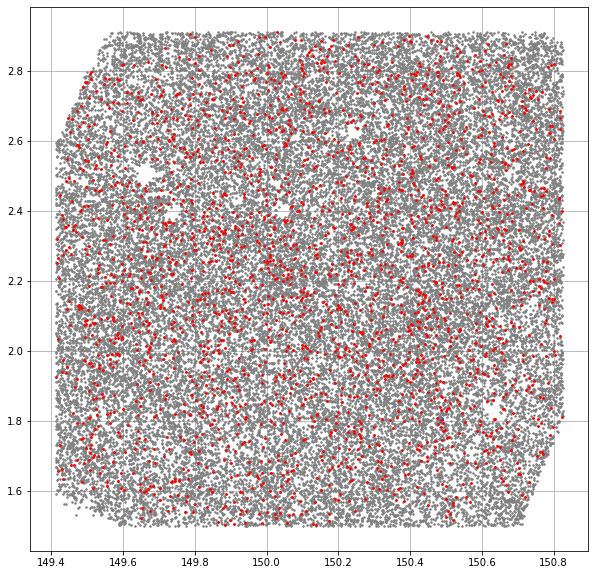

In [14]:
circle = Circle((cosmos_ra_24_match[365], cosmos_dec_24_match[365]),
                radius=0.005, color='b', fill=False, lw=3)

plt.figure(figsize=(10,10))
plt.plot(cosmos_ra_24,cosmos_dec_24,'.',ms=3,color='gray')
plt.plot(cosmos_ra_24_match,cosmos_dec_24_match,'.',ms=3.5,color='r')
plt.gca().add_patch(circle)
plt.grid()
# plt.xlim(150.4,150.6)
# plt.ylim(1.7,1.9)
plt.show()

In [15]:
total_check = []
for j in range(len(cosmos_ra_24_match)):
    check = []
    for i in range(len(cosmos_ra_24)):
        out = radius_check(cosmos_ra_24_match[j],cosmos_dec_24_match[j],0.005,cosmos_ra_24[i],cosmos_dec_24[i])
        check.append(out)
    check = np.asarray(check)
    total_check.append(len(check[check == 0]))
total_check = np.asarray(total_check)


print(len(cosmos_ra_24))
print(len(check))
print('within: ',len(check[check == 0]))
print('outside: ',len(check[check == 1]))

print(len(total_check))
print(np.mean(total_check),np.median(total_check))

42633
42633
within:  1
outside:  42632
2341
2.8363947031183256 3.0


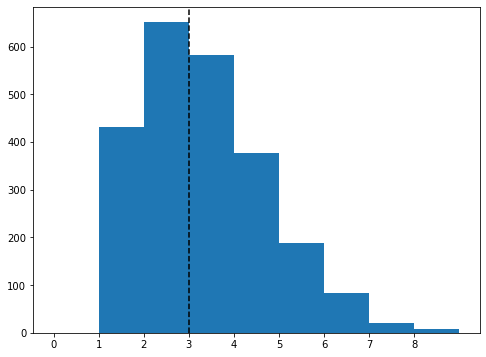

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(total_check, bins=np.arange(0, 10))
plt.axvline(np.median(total_check), color='k', ls='--')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()


In [17]:
total_check = []
for j in range(len(cosmos_ra_24_match)):
    check = []
    for i in range(len(cosmos_ra_24_med)):
        out = radius_check(
            cosmos_ra_24_match[j], cosmos_dec_24_match[j], 0.005, cosmos_ra_24_med[i], cosmos_dec_24_med[i])
        check.append(out)
    check = np.asarray(check)
    total_check.append(len(check[check == 0]))
total_check = np.asarray(total_check)


print(len(cosmos_ra_24))
print(len(check))
print('within: ', len(check[check == 0]))
print('outside: ', len(check[check == 1]))

print(len(total_check))
print(np.mean(total_check), np.median(total_check))


42633
10018
within:  0
outside:  10018
2341
0.9461768475010679 1.0


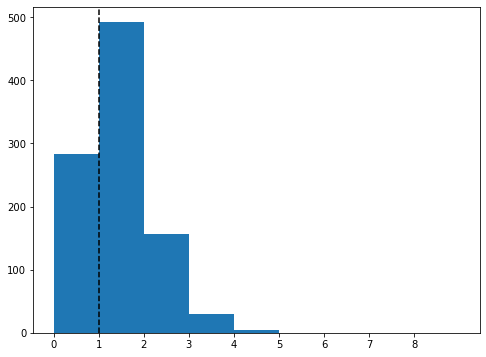

0.19772256728778467


In [28]:
plt.figure(figsize=(8, 6))
plt.hist(total_check, bins=np.arange(0, 10))
plt.axvline(np.median(total_check), color='k', ls='--')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()


print(len(total_check[total_check > 1])/len(total_check))


In [21]:
total_check = []
for j in range(len(cosmos_ra_24_match)):
    check = []
    for i in range(len(cosmos_ra_24_med2)):
        out = radius_check(
            cosmos_ra_24_match[j], cosmos_dec_24_match[j], 0.005, cosmos_ra_24_med2[i], cosmos_dec_24_med2[i])
        check.append(out)
    check = np.asarray(check)
    total_check.append(len(check[check == 0]))
total_check = np.asarray(total_check)


print(len(cosmos_ra_24))
print(len(check))
print('within: ', len(check[check == 0]))
print('outside: ', len(check[check == 1]))

print(len(total_check))
print(np.mean(total_check), np.median(total_check))


42633
4972
within:  0
outside:  4972
2341
0.5536095685604443 0.0


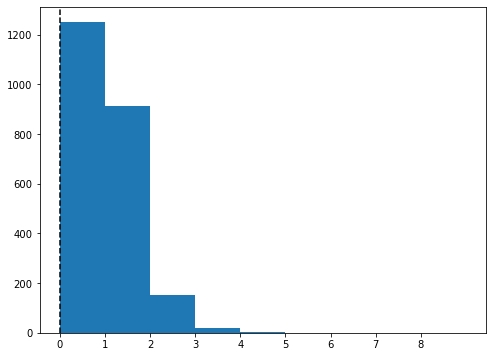

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(total_check, bins=np.arange(0, 10))
plt.axvline(np.median(total_check), color='k', ls='--')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()


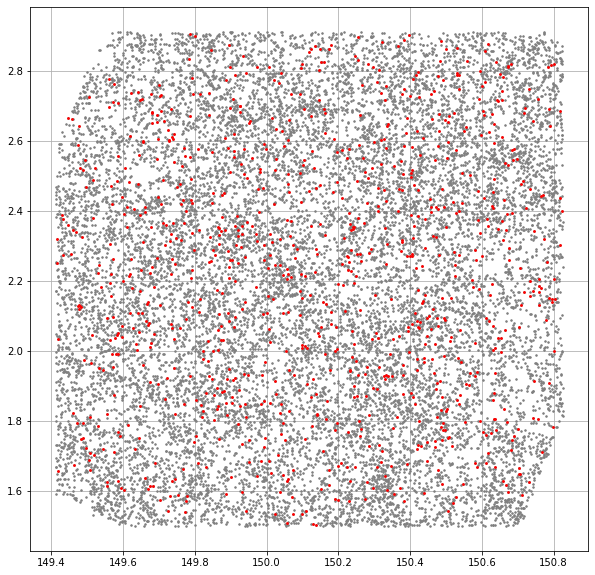

In [23]:
plt.figure(figsize=(10,10))
plt.plot(cosmos_ra_250,cosmos_dec_250,'.',ms=3,color='gray')
plt.plot(cosmos_ra_250_match,cosmos_dec_250_match,'.',ms=3.5,color='r')
plt.grid()
plt.show()

In [24]:
total_check = []
for j in range(len(cosmos_ra_250_match)):
    check = []
    for i in range(len(cosmos_ra_250)):
        out = radius_check(cosmos_ra_250_match[j],cosmos_dec_250_match[j],0.005,cosmos_ra_250[i],cosmos_dec_250[i])
        check.append(out)
    check = np.asarray(check)
    total_check.append(len(check[check == 0]))
total_check = np.asarray(total_check)


print(len(cosmos_ra_24))
print(len(check))
print('within: ',len(check[check == 0]))
print('outside: ',len(check[check == 1]))

print(len(total_check))
print(np.mean(total_check),np.median(total_check))


42633
16779
within:  1
outside:  16778
966
1.670807453416149 1.0


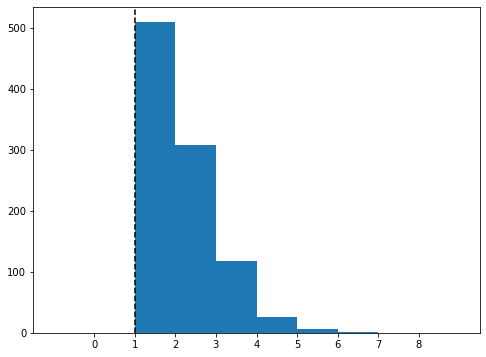

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(total_check, bins=np.arange(-1, 10))
plt.axvline(np.median(total_check), color='k', ls='--')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()


In [26]:
total_check = []
for j in range(len(cosmos_ra_250_match)):
    check = []
    for i in range(len(cosmos_ra_250_med)):
        out = radius_check(cosmos_ra_250_match[j],cosmos_dec_250_match[j],0.005,cosmos_ra_250_med[i],cosmos_dec_250_med[i])
        check.append(out)
    check = np.asarray(check)
    total_check.append(len(check[check == 0]))
total_check = np.asarray(total_check)


print(len(cosmos_ra_24))
print(len(check))
print('within: ',len(check[check == 0]))
print('outside: ',len(check[check == 1]))

print(len(total_check))
print(np.mean(total_check),np.median(total_check))

42633
8234
within:  1
outside:  8233
966
0.9461697722567288 1.0


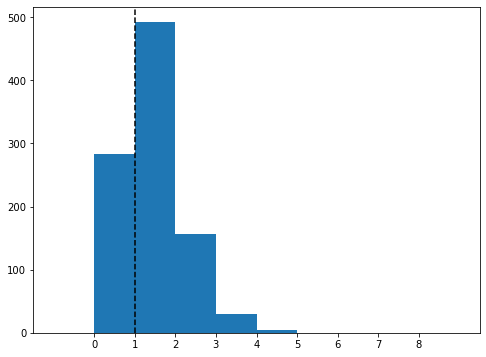

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(total_check, bins=np.arange(-1, 10))
plt.axvline(np.median(total_check), color='k', ls='--')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.show()